In [1]:
# standard library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

# local classes
os.chdir('../')
from TraversalDistance.Graph import Graph
from TraversalDistance.FreeSpaceGraph import FreeSpaceGraph
from TraversalDistance.Visualize import Visualize
from TraversalDistance.BinarySearch import BinarySearch
os.chdir('letter_data')

In [2]:
def json_to_graph(json_data):    
    graph = Graph()
    graph.name = json_data['gxl']['graph'][0]['$']['id'][0]
    
    # Extract X, Y coordinates from 'node' elements.
    for node_data in json_data['gxl']['graph'][0]['node']:
        node_id = int(node_data['$']['id'][1:])
        x_coord = float(node_data['attr'][0]['float'][0])
        y_coord = float(node_data['attr'][1]['float'][0])
        graph.addNode(node_id, x_coord, y_coord)

    # Extract edges from 'edge' elements.
    for i, edge_data in enumerate(json_data['gxl']['graph'][0]['edge'], 1):
        from_node = int(edge_data['$']['from'][1:])
        to_node = int(edge_data['$']['to'][1:])
        graph.connectTwoNodes(i, from_node, to_node)
        
    return graph, graph.name

In [12]:
file_names = os.listdir("LOW")
graphs = dict()

for index, file_name in enumerate(file_names):
    if file_name.endswith('.json'):
        try:         
            json_graph = json.load(open(f"LOW/{file_name}"))
   
            ######## testing if graphs inputted correctly #########
            g1, n1 = json_to_graph(json_graph)
            g1.id = 0
            g2, n2 = json_to_graph(json_graph)
            g1.id = 1
            fsg = FreeSpaceGraph(g1, g2, 0.01)
            check = fsg.DFSTraversalDist()
            if check:
            ######## testing if graphs inputted correctly #########
            
                graph, name = json_to_graph(json_graph)
                graph.id = index           
                if name in graphs.keys():
                    graphs[name].append(graph)
                else:
                    graphs[name] = [graph]
                
        except Exception as error: 
            print(f"AssertionError {error}: Fail to parse {file_name}.")

AssertionError float division by zero: Fail to parse AP1_0028.json.
AssertionError float division by zero: Fail to parse XP1_0130.json.
AssertionError float division by zero: Fail to parse HP1_0136.json.
AssertionError math domain error: Fail to parse TP1_0042.json.
AssertionError float division by zero: Fail to parse HP1_0073.json.
AssertionError float division by zero: Fail to parse XP1_0075.json.
AssertionError float division by zero: Fail to parse NP1_0043.json.
AssertionError math domain error: Fail to parse AP1_0090.json.
AssertionError float division by zero: Fail to parse HP1_0024.json.
AssertionError float division by zero: Fail to parse ZP1_0108.json.
AssertionError math domain error: Fail to parse FP1_0093.json.
AssertionError float division by zero: Fail to parse FP1_0139.json.
AssertionError float division by zero: Fail to parse KP1_0078.json.
AssertionError math domain error: Fail to parse KP1_0097.json.
AssertionError float division by zero: Fail to parse TP1_0146.json.


In [13]:
for key in graphs.keys():
    count = len(graphs[key])
    print(f"{key}: {count}")

T: 39
Y: 136
I: 149
E: 132
N: 126
L: 143
M: 139
X: 44
V: 141
W: 135
H: 15
Z: 129
K: 11
F: 35
A: 10


In [29]:
# Sample
g1, g2 = graphs['Y'][2], graphs['Y'][1]

# comparing graph two and graph one
binary_search = BinarySearch(g1, g2, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_2 by graph_1 (traversed) minimum epsilon:", epsilon)
print(len(binary_search.cell_boundaries))

# comparing graph one and graph two
binary_search = BinarySearch(g2, g1, left=0, right=5, precision=0.01)
epsilon = binary_search.search()
print("Computing graph_1 by graph_2 (traversed) minimum epsilon:", epsilon)
print(len(binary_search.cell_boundaries))


2.5 True
1.25 True
0.625 True
0.3125 True
0.15625 False
0.234375 True
0.1953125 True
0.17578125 True
0.166015625 True
Computing graph_2 by graph_1 (traversed) minimum epsilon: 0.166015625
24
2.5 True
1.25 True
0.625 True
0.3125 True
0.15625 False
0.234375 True
0.1953125 True
0.17578125 True
0.166015625 True
Computing graph_1 by graph_2 (traversed) minimum epsilon: 0.166015625
24


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Epsilon: 0.166015625'}>)

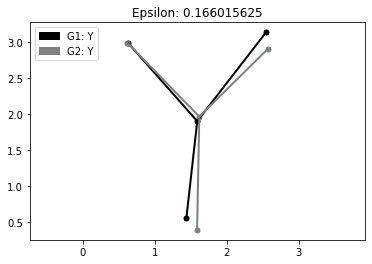

In [30]:
visual = Visualize(g1, g2, epsilon=epsilon)
visual.plot_freespace()